In [6]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import mlab
import pylab

from matplotlib.pyplot import figure
%matplotlib inline

# Красивые графики
plt.style.use('ggplot')
#plt.style.use('seaborn')

# Размер картинок
plt.rcParams['figure.figsize'] = (12, 5)  
plt.rcParams['figure.dpi'] = 200

#векторный формат
%config InlineBackend.figure_format = 'svg'

## Прогружаем данные

In [8]:
df0 = pd.read_csv('Data/BTC_Kraken.csv', parse_dates=['Date'])
ETH = pd.read_csv('Data/ETH_Bitfinex.csv', parse_dates=['Date'])
Cash = pd.read_csv('Data/LTC_Bitfinex.csv', parse_dates=['Date'])
LTC = pd.read_csv('Data/LTC_Bitfinex.csv', parse_dates=['Date'])
Dash = pd.read_csv('Data/DASH_Poloniex.csv', parse_dates=['Date'])

print(len(df0), len(ETH), len(LTC), len(Dash), len(Cash))

1279 1280 1280 1280 1280


## Обработка данных

In [9]:
df0['BTC'] = df0['Price']
df0['ETH'] = ETH['Price']
df0['LTC'] = LTC['Price']
df0['Dash'] = Dash['Price']
df0['Cash'] = Cash['Price']

del df0['Price'], df0['Open'], df0['High'], df0['Low'], df0['Vol.'], df0['Change %']

df0['BTC'] = df0['BTC'].str.replace(',', '').astype(float)
df0['ETH'] = df0['ETH'].str.replace(',', '').astype(float)
df0['Dash'] = df0['Dash'].str.replace(',', '').astype(float)
df0['Cash'] = df0['Cash'].astype(float)
df0['LTC'] = df0['LTC'].astype(float)

#сделаем инверсию таблицы с котировками
df0 = df0[-1:1:-1]

#работа с кэшем
df0['Cash'] = 1
#del df0['Cash']

#исключаем ненужное
#del df0['LTC']
#del df0['Dash']

In [10]:
df0

Date       BTC     ETH    LTC    Dash  Cash
1278 2016-03-10    415.83   11.95   3.36    5.05     1
1277 2016-03-11    420.35   12.92   3.26    5.32     1
1276 2016-03-12    406.65   15.07   3.28    5.45     1
1275 2016-03-13    408.32   12.50   3.28    5.47     1
1274 2016-03-14    414.43   13.06   3.28    5.81     1
1273 2016-03-15    415.14   12.88   3.29    6.27     1
1272 2016-03-16    418.17   10.74   3.29    5.81     1
1271 2016-03-17    419.81   10.74   3.15    5.80     1
1270 2016-03-18    407.90   10.31   3.16    6.00     1
1269 2016-03-19    409.53   10.18   3.19    5.96     1
1268 2016-03-20    413.64   11.95   3.19    6.00     1
1267 2016-03-21    412.32   11.37   3.22    6.06     1
1266 2016-03-22    417.16   12.43   3.23    6.56     1
1265 2016-03-23    416.00   11.20   3.21    6.54     1
1264 2016-03-24    415.04   10.67   3.21    7.32     1
1263 2016-03-25    415.34   11.00   3.24    7.16     1
1262 2016-03-26    417.57   10.40   3.30    7.14     1
1261 2016-03-27    425.01   11.62   3.27    7.02     1
1260 2016-03-28    423.00   11.79   3.22    7.08     1
1259 2016-03-29    416.70   11.85   3.21    7.03     1
1258 2016-03-30    412.43   11.41   3.25    6.85     1
1257 2016-03-31    416.10   11.62   3.23    7.10     1
1256 2016-04-01    417.90   11.61   3.27    7.12     1
1255 2016-04-02    421.00   11.75   3.24    7.04     1
1254 2016-04-03    421.50   11.15   3.25    6.92     1
1253 2016-04-04    420.99   10.40   3.26    7.04     1
1252 2016-04-05    422.76   10.76   3.25    6.99     1
1251 2016-04-06    423.55   10.12   3.23    6.94     1
1250 2016-04-07    422.01    9.71   3.23    7.01     1
1249 2016-04-08    418.55    9.15   3.23    6.63     1
...         ...       ...     ...    ...     ...   ...
31   2019-08-10  11284.70  206.57  85.42   99.06     1
30   2019-08-11  11546.90  217.21  90.41  106.52     1
29   2019-08-12  11384.20  211.61  85.92  105.50     1
28   2019-08-13  10850.10  209.25  84.72  101.83     1
27   2019-08-14  10018.00  187.28  76.05   95.68     1
26   2019-08-15  10305.50  188.59  76.42   95.19     1
25   2019-08-16  10362.10  185.61  74.96   94.11     1
24   2019-08-17  10211.80  185.82  72.81   91.01     1
23   2019-08-18  10326.40  194.90  76.49   95.43     1
22   2019-08-19  10920.10  202.66  77.22   97.69     1
21   2019-08-20  10755.20  196.67  75.29   93.81     1
20   2019-08-21  10125.00  187.66  73.16   89.13     1
19   2019-08-22  10113.00  190.69  73.56   91.00     1
18   2019-08-23  10406.30  194.78  75.59   92.98     1
17   2019-08-24  10140.50  191.04  73.29   92.11     1
16   2019-08-25  10140.40  186.31  72.09   90.85     1
15   2019-08-26  10364.60  188.73  73.68   92.06     1
14   2019-08-27  10178.30  187.29  72.90   90.80     1
13   2019-08-28   9716.10  173.21  66.83   84.91     1
12   2019-08-29   9478.30  169.15  63.64   79.50     1
11   2019-08-30   9578.00  168.63  64.38   79.80     1
10   2019-08-31   9604.30  172.13  64.55   80.35     1
9    2019-09-01   9764.90  171.25  66.24   79.34     1
8    2019-09-02  10389.50  178.70  67.22   81.61     1
7    2019-09-03  10614.60  179.39  69.32   82.60     1
6    2019-09-04  10584.90  175.10  67.23   81.95     1
5    2019-09-05  10574.90  174.03  65.29   80.07     1
4    2019-09-06  10322.80  169.35  65.08   80.65     1
3    2019-09-07  10483.40  178.41  69.03   83.46     1
2    2019-09-08  10409.60  181.96  70.62   87.50     1

[1277 rows x 6 columns]

## Выбираем временной диапазон данных

In [11]:
df1 = df0.loc[df0['Date'] >= datetime(2016, 3, 10)]
df1 = df1.loc[df1['Date'] < datetime(2019, 9, 10)]

df1 = df1.set_index('Date')

In [12]:
df1

BTC     ETH    LTC    Dash  Cash
Date                                             
2016-03-10    415.83   11.95   3.36    5.05     1
2016-03-11    420.35   12.92   3.26    5.32     1
2016-03-12    406.65   15.07   3.28    5.45     1
2016-03-13    408.32   12.50   3.28    5.47     1
2016-03-14    414.43   13.06   3.28    5.81     1
2016-03-15    415.14   12.88   3.29    6.27     1
2016-03-16    418.17   10.74   3.29    5.81     1
2016-03-17    419.81   10.74   3.15    5.80     1
2016-03-18    407.90   10.31   3.16    6.00     1
2016-03-19    409.53   10.18   3.19    5.96     1
2016-03-20    413.64   11.95   3.19    6.00     1
2016-03-21    412.32   11.37   3.22    6.06     1
2016-03-22    417.16   12.43   3.23    6.56     1
2016-03-23    416.00   11.20   3.21    6.54     1
2016-03-24    415.04   10.67   3.21    7.32     1
2016-03-25    415.34   11.00   3.24    7.16     1
2016-03-26    417.57   10.40   3.30    7.14     1
2016-03-27    425.01   11.62   3.27    7.02     1
2016-03-28    423.00   11.79   3.22    7.08     1
2016-03-29    416.70   11.85   3.21    7.03     1
2016-03-30    412.43   11.41   3.25    6.85     1
2016-03-31    416.10   11.62   3.23    7.10     1
2016-04-01    417.90   11.61   3.27    7.12     1
2016-04-02    421.00   11.75   3.24    7.04     1
2016-04-03    421.50   11.15   3.25    6.92     1
2016-04-04    420.99   10.40   3.26    7.04     1
2016-04-05    422.76   10.76   3.25    6.99     1
2016-04-06    423.55   10.12   3.23    6.94     1
2016-04-07    422.01    9.71   3.23    7.01     1
2016-04-08    418.55    9.15   3.23    6.63     1
...              ...     ...    ...     ...   ...
2019-08-10  11284.70  206.57  85.42   99.06     1
2019-08-11  11546.90  217.21  90.41  106.52     1
2019-08-12  11384.20  211.61  85.92  105.50     1
2019-08-13  10850.10  209.25  84.72  101.83     1
2019-08-14  10018.00  187.28  76.05   95.68     1
2019-08-15  10305.50  188.59  76.42   95.19     1
2019-08-16  10362.10  185.61  74.96   94.11     1
2019-08-17  10211.80  185.82  72.81   91.01     1
2019-08-18  10326.40  194.90  76.49   95.43     1
2019-08-19  10920.10  202.66  77.22   97.69     1
2019-08-20  10755.20  196.67  75.29   93.81     1
2019-08-21  10125.00  187.66  73.16   89.13     1
2019-08-22  10113.00  190.69  73.56   91.00     1
2019-08-23  10406.30  194.78  75.59   92.98     1
2019-08-24  10140.50  191.04  73.29   92.11     1
2019-08-25  10140.40  186.31  72.09   90.85     1
2019-08-26  10364.60  188.73  73.68   92.06     1
2019-08-27  10178.30  187.29  72.90   90.80     1
2019-08-28   9716.10  173.21  66.83   84.91     1
2019-08-29   9478.30  169.15  63.64   79.50     1
2019-08-30   9578.00  168.63  64.38   79.80     1
2019-08-31   9604.30  172.13  64.55   80.35     1
2019-09-01   9764.90  171.25  66.24   79.34     1
2019-09-02  10389.50  178.70  67.22   81.61     1
2019-09-03  10614.60  179.39  69.32   82.60     1
2019-09-04  10584.90  175.10  67.23   81.95     1
2019-09-05  10574.90  174.03  65.29   80.07     1
2019-09-06  10322.80  169.35  65.08   80.65     1
2019-09-07  10483.40  178.41  69.03   83.46     1
2019-09-08  10409.60  181.96  70.62   87.50     1

[1277 rows x 5 columns]

## Смотрим динамику курсов валют

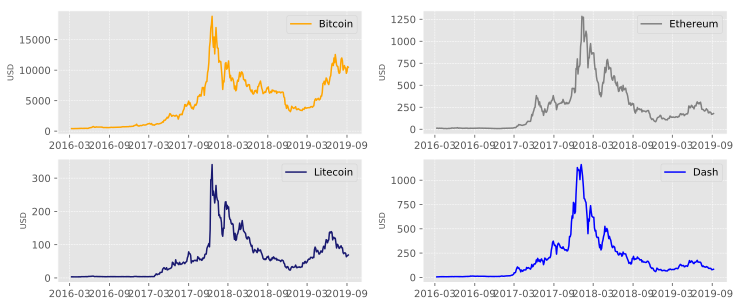

In [6]:
figure(figsize=(12,5))

pylab.subplot (2, 2, 1)
pylab.plot(df1['BTC'][0::3], color='orange', marker='', 
           linestyle='-', markerfacecolor='blue', label = 'Bitcoin')
pylab.grid(linestyle='--', linewidth=0.5)
pylab.ylabel('USD', fontsize=8)
pylab.legend(loc='best')

pylab.subplot (2, 2, 2)
pylab.plot(df1['ETH'][0::3], color='grey', marker='', 
           linestyle='-', markerfacecolor='blue', label = 'Ethereum')
pylab.grid(linestyle='--', linewidth=0.5)
pylab.ylabel('USD', fontsize=8)
pylab.legend(loc='best')

pylab.subplot (2, 2, 3)
pylab.plot(df1['LTC'][0::3], color='midnightblue', marker='', 
           linestyle='-', markerfacecolor='blue', label = 'Litecoin')
pylab.grid(linestyle='--', linewidth=0.5)
pylab.ylabel('USD', fontsize=8)
pylab.legend(loc='best')

pylab.subplot (2, 2, 4)
pylab.plot(df1['Dash'][0::3], color='blue', marker='', 
           linestyle='-', markerfacecolor='blue', label = 'Dash')
pylab.grid(linestyle='--', linewidth=0.5)
pylab.ylabel('USD', fontsize=8)
pylab.legend(loc='best')

pylab.show()

In [7]:
df1.tail()

BTC     ETH    LTC   Dash  Cash
Date                                           
2019-09-04  10584.9  175.10  67.23  81.95     1
2019-09-05  10574.9  174.03  65.29  80.07     1
2019-09-06  10322.8  169.35  65.08  80.65     1
2019-09-07  10483.4  178.41  69.03  83.46     1
2019-09-08  10409.6  181.96  70.62  87.50     1

## Проверяем взаимную корреляцию

In [8]:
df1.corr()

BTC       ETH       LTC      Dash  Cash
BTC   1.000000  0.795595  0.909862  0.779558   NaN
ETH   0.795595  1.000000  0.900467  0.898739   NaN
LTC   0.909862  0.900467  1.000000  0.883647   NaN
Dash  0.779558  0.898739  0.883647  1.000000   NaN
Cash       NaN       NaN       NaN       NaN   NaN

## Доходность каждого из активов

Доходность (Rate of Return) – это относительный прирост стоимости актива в каждом из периодов по отношению к предыдущему значению:
$$
ROR(t_i) = \frac{Close(t_i)}{Close(t_{i-1})} - 1 , \ i = 1,\ldots,n
$$

In [9]:
close = df1['BTC'][::30].values.copy()
ror = np.diff(close) / close[:-1]

aror = (ror + 1.).cumprod() - 1.

years_total = aror.size / 12
cagr = ((aror[-1] + 1.)/(aror[0] + 1.)) ** (1 / years_total) - 1.
print('Среднегодовая доходность = ', round(cagr*100, 2),'%')

Среднегодовая доходность =  150.53 %


## Риск

In [10]:
risk_monthly = ror.std()
ror_mean = (1. + ror).mean()
risk_yearly = np.sqrt((risk_monthly**2 + ror_mean**2)**12 - ror_mean**24)

print('СКО = ', round(risk_yearly*100, 2), '%')

СКО =  353.64 %


## Визуализация всевозможных портфелей

In [11]:
selected = ['BTC', 'ETH', 'LTC', 'Dash', 'Cash']

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 10000

returns_daily = df1.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

In [12]:
#set random seed for reproduction's sake
np.random.seed(101)


# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets-1)   # добавил "-1"
    weights /= np.sum(weights) / 0.8           # добавил " / 0.8"
    
    ### добавил
    weights = np.append(weights, 0.2)
    ###
    
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]
    
# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

#df.tail()

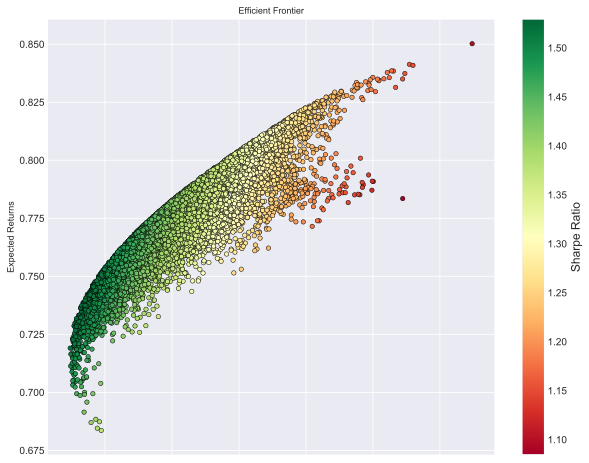

In [13]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio', 
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)', fontsize = 9)
plt.ylabel('Expected Returns', fontsize = 9)
plt.title('Efficient Frontier', fontsize = 9)
plt.show()

## Оптимальное соотношение активов

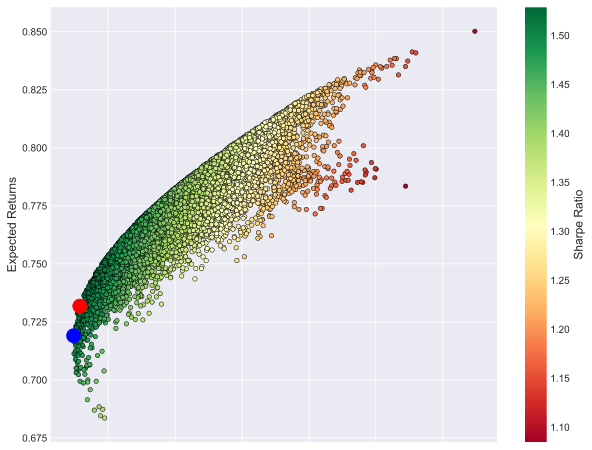

In [14]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='o', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='o', s=200 )
plt.xlabel('Standard deviation')
plt.ylabel('Expected Returns')
#plt.title('Efficient Frontier')
plt.show()

In [15]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                  8328
Returns       0.719057
Volatility    0.474006
Sharpe Ratio  1.516979
BTC Weight    0.511595
ETH Weight    0.066185
LTC Weight    0.063249
Dash Weight   0.158971
Cash Weight   0.200000
                  9739
Returns       0.731821
Volatility    0.478673
Sharpe Ratio  1.528855
BTC Weight    0.447752
ETH Weight    0.090188
LTC Weight    0.105214
Dash Weight   0.156847
Cash Weight   0.200000
